In [1]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 収益率データの読み込み
R = pd.read_csv('asset_return_data.csv', index_col=0)
T = R.shape[0]
N = R.shape[1]
Mu = R.mean().values
Sigma = R.cov().values * ((T - 1.0) / T)
Return_Dev = (R - Mu).values / np.sqrt(T)
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(N)
Deviation = cvx.Variable(T)
Target_Return = cvx.Parameter(sign='positive')
Risk_Variance = cvx.sum_squares(Deviation)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Return_Dev*Weight == Deviation,
                             Weight.T*Mu == Target_Return,
                             cvx.sum_entries(Weight) == 1.0,
                             Weight >= 0.0])
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
#%% 最小分散フロンティアのグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(V_Risk, V_Target, 'k-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'kx')
plt.legend([u'最小分散フロンティア', u'個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'標準偏差(%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率(%)', fontproperties=jpfont)
plt.show()

<Figure size 640x480 with 1 Axes>

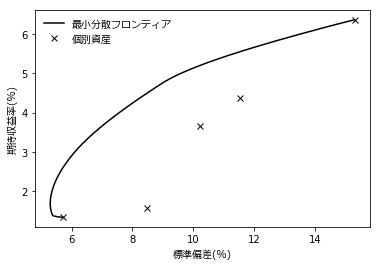

In [2]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 収益率データの読み込み
R = pd.read_csv('asset_return_data.csv', index_col=0)
T = R.shape[0]
N = R.shape[1]
Mu = R.mean().values
Sigma = R.cov().values * ((T - 1.0) / T)
Return_Dev = (R - Mu).values / np.sqrt(T)
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(N)
Deviation = cvx.Variable(T)
Target_Return = cvx.Parameter(sign='positive')
Risk_Variance = cvx.sum_squares(Deviation)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Return_Dev*Weight == Deviation,
                             Weight.T*Mu == Target_Return,
                             cvx.sum_entries(Weight) == 1.0,
                             Weight >= 0.0])
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
#%% 最小分散フロンティアのグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(V_Risk, V_Target, 'k-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'kx')
plt.legend([u'最小分散フロンティア', u'個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'標準偏差(%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率(%)', fontproperties=jpfont)
plt.show()

In [3]:
R

,資産1,資産2,資産3,資産4,資産5
2007-01-31,-2.313057,-4.503855,0.530932,1.392579,-1.345408
2007-02-28,-2.474033,-2.361441,-19.814875,12.819493,-10.031085
2007-03-31,-5.384739,2.588934,10.350946,10.356395,-1.664494
2007-04-30,-5.992190,-0.496439,-4.770446,-5.838914,-21.171828
2007-05-31,-4.701301,-13.822786,6.776691,-4.201704,21.390680
2007-06-30,14.334365,-1.641019,10.873043,40.106349,12.679568
2007-07-31,5.850337,21.722096,-0.098886,8.566744,22.783306
2007-08-31,1.733812,5.186522,5.509462,3.031329,7.429171
2007-09-30,5.698408,3.047701,-3.383504,33.851764,7.051331
2007-10-31,-2.003163,-10.209126,-21.065882,-13.882548,-10.405724


In [4]:
R.mean()

資産1    1.332510
資産2    3.654578
資産3    1.568705
資産4    6.362088
資産5    4.364875
dtype: float64

In [7]:
R.cov()

,資産1,資産2,資産3,資産4,資産5
資産1,33.148414,25.988149,15.988686,8.412850,23.077758
資産2,25.988149,105.106835,38.404855,30.461266,33.450400
資産3,15.988686,38.404855,72.411760,40.157212,46.899702
資産4,8.412850,30.461266,40.157212,235.523899,75.092538
資産5,23.077758,33.450400,46.899702,75.092538,134.246102


In [6]:
R.cov()

,資産1,資産2,資産3,資産4,資産5
資産1,33.148414,25.988149,15.988686,8.412850,23.077758
資産2,25.988149,105.106835,38.404855,30.461266,33.450400
資産3,15.988686,38.404855,72.411760,40.157212,46.899702
資産4,8.412850,30.461266,40.157212,235.523899,75.092538
資産5,23.077758,33.450400,46.899702,75.092538,134.246102
